In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv("df_clean.csv")

In [3]:
# data cleaning and indexing
df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new dataframe
display(df.shape)
display(df.head())
display(df.tail())

(2294804, 18)

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01          INDECENCY WITH A CHILD/CONTACT               Y   
2003-01-01                          IDENTITY THEFT               N   
2003-01-01          INDECENCY WITH A CHILD/CONTACT               Y   

                       report_date_time                    location_type  \
occurred_date_time                                                         
2003-01-01          2008-05-10 18:36:00                 RESIDENCE / HOME   
2003-01-01          2009-08-07 14:23:00                 RESIDENCE / HOME   
2003-01-01          2007-05-10 09:52:00                 RESIDENCE / HOME   
2003-01-01          2012-01-23 09:41:00  SPECIALTY  STORE (TV  FUR ETC.)   
2003-01-01          2017-10-02 21:14:00                 RESIDENCE / HOME   

                                             address  zip_code  \
occurred_date_time                                               
2003-01-01                   7312 WHISPERING OAKS DR   78745.0   
2003-01-01                           6800 MC NEIL DR   78729.0   
2003-01-01               9400 BLOCK GROUSE MEADOW LN   78758.0   
2003-01-01                     1533 CUTTING HORSE LN   78727.0   
2003-01-01          1200 BLOCK AUSTIN HIGHLANDS BLVD   78745.0   

                    council_district apd_sector apd_district clearance_status  \
occurred_date_time                                                              
2003-01-01                       5.0         FR            1              NaN   
2003-01-01                       6.0         AD            4              NaN   
2003-01-01                       4.0         ED            1                C   
2003-01-01                       7.0         ED            4                N   
2003-01-01                       2.0         FR            4                N   

                         clearance_date   latitude  longitude  year  month  \
occurred_date_time                                                           
2003-01-01          2008-05-13 00:00:00  30.202175 -97.817542  2003      1   
2003-01-01                          NaN  30.438983 -97.759669  2003      1   
2003-01-01          2007-07-02 00:00:00        NaN        NaN  2003      1   
2003-01-01          2012-01-23 00:00:00  30.416668 -97.683656  2003      1   
2003-01-01          2018-08-02 00:00:00        NaN        NaN  2003      1   

                    week  day  hour  
occurred_date_time                   
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0  
2003-01-01             1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                
2020-12-19 18:55:00       BURGLARY OF RESIDENCE               N   
2020-12-19 19:00:00                  HARASSMENT               N   
2020-12-19 19:33:00             THEFT FROM AUTO               N   
2020-12-19 19:38:00          FAMILY DISTURBANCE               N   
2020-12-19 20:57:00                  AUTO THEFT               N   

                        report_date_time           location_type  \
occurred_date_time                                                 
2020-12-19 18:55:00  2020-12-19 19:14:00        RESIDENCE / HOME   
2020-12-19 19:00:00  2020-12-19 21:07:00        RESIDENCE / HOME   
2020-12-19 19:33:00  2020-12-19 19:33:00        RESIDENCE / HOME   
2020-12-19 19:38:00  2020-12-19 19:38:00        RESIDENCE / HOME   
2020-12-19 20:57:00  2020-12-19 20:57:00  GAS / SERVICE STATIONS   

                                 address  zip_code  council_district  \
occurred_date_time                                                     
2020-12-19 18:55:00     4404 E OLTORF ST   78741.0               3.0   
2020-12-19 19:00:00  4806 MISTY SLOPE LN   78744.0               2.0   
2020-12-19 19:33:00   504 BLUE VALLEY DR   78748.0               2.0   
2020-12-19 19:38:00   815 W SLAUGHTER LN   78748.0               5.0   
2020-12-19 20:57:00     1747 E OLTORF ST   78741.0               3.0   

                    apd_sector apd_district clearance_status clearance_date  \
occurred_date_time                                                            
2020-12-19 18:55:00         HE            4              NaN            NaN   
2020-12-19 19:00:00         FR            8              NaN            NaN   
2020-12-19 19:33:00         FR            3              NaN            NaN   
2020-12-19 19:38:00         FR            2              NaN            NaN   
2020-12-19 20:57:00         HE            2              NaN            NaN   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2020-12-19 18:55:00  30.227065 -97.726246  2020     12    51   19    18  
2020-12-19 19:00:00  30.177491 -97.753304  2020     12    51   19    19  
2020-12-19 19:33:00  30.182568 -97.790536  2020     12    51   19    19  
2020-12-19 19:38:00  30.173685 -97.806397  2020     12    51   19    19  
2020-12-19 20:57:00  30.232066 -97.737400  2020     12    51   19    20

In [4]:
# Creating violent crime and murder dataframes for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)

df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

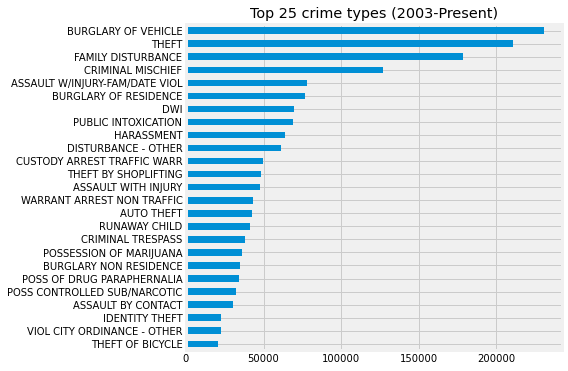

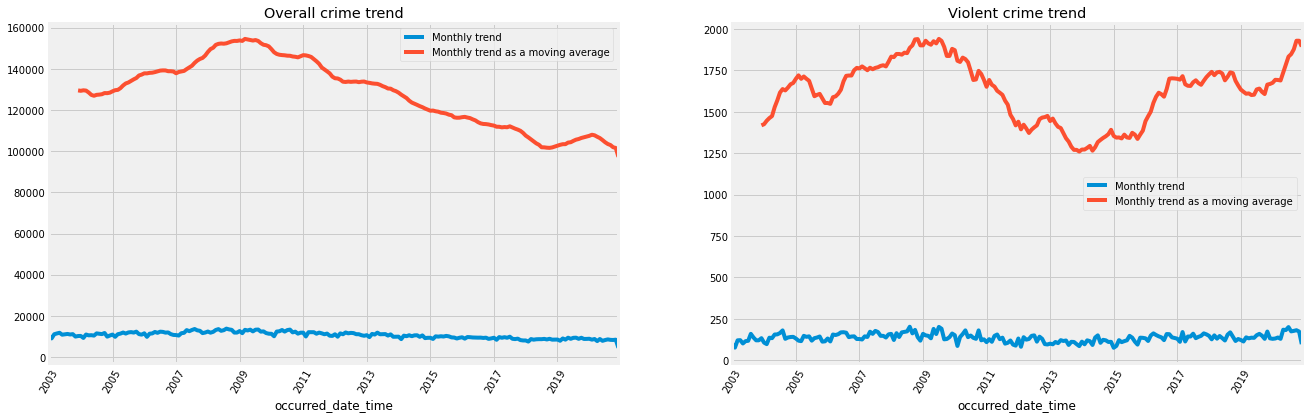

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

# Visualizing trends (overall and violent)
fig, axs = plt.subplots(ncols=2, figsize=(20, 6.25))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend", rot=60, ax=axs[0]
)
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])

df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", rot=60, ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

## Predicting crime rates with Facebook Prophet 

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


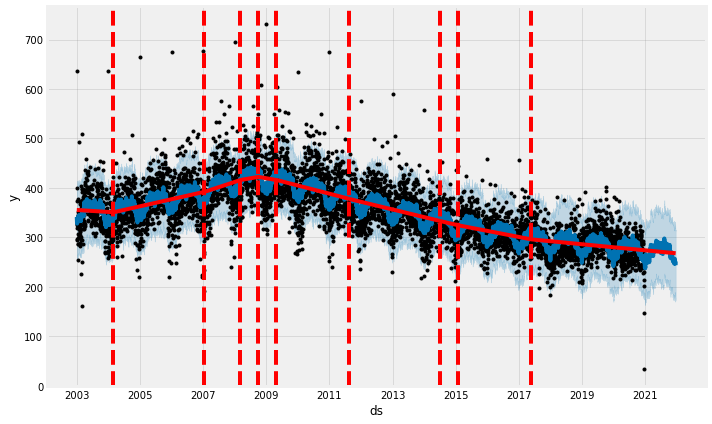

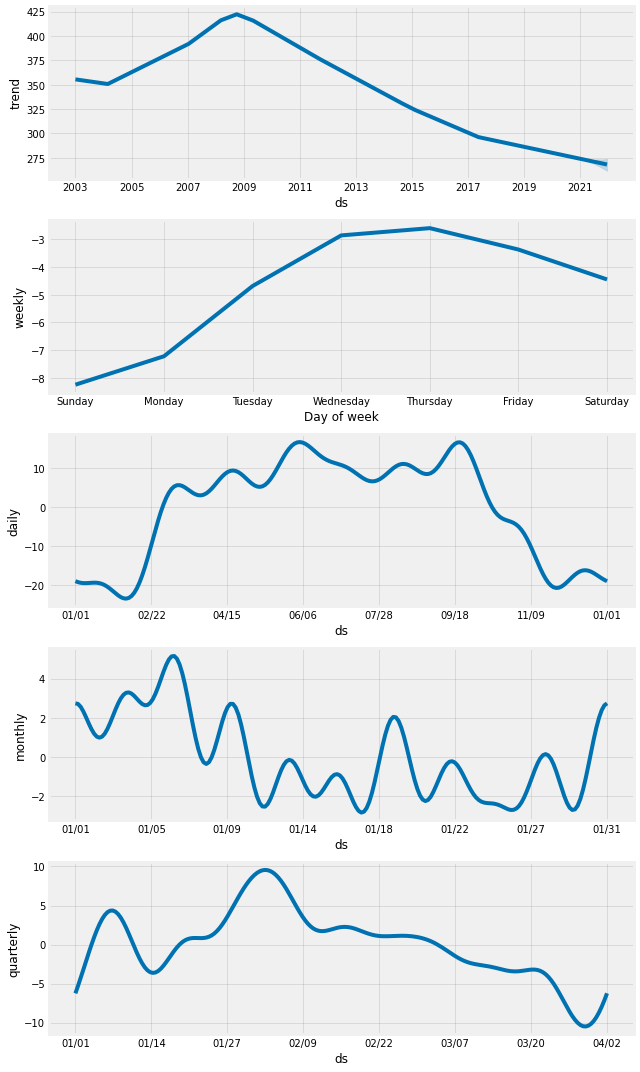

In [6]:
# forecasting for overall crime
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast)
fig2_1 = plot_plotly(m, forecast)

fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


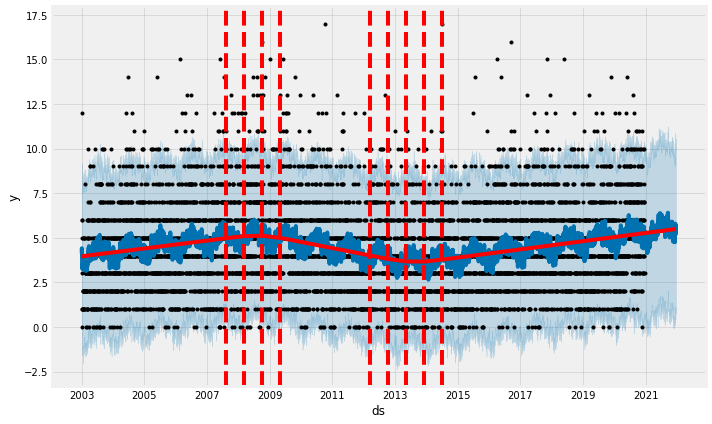

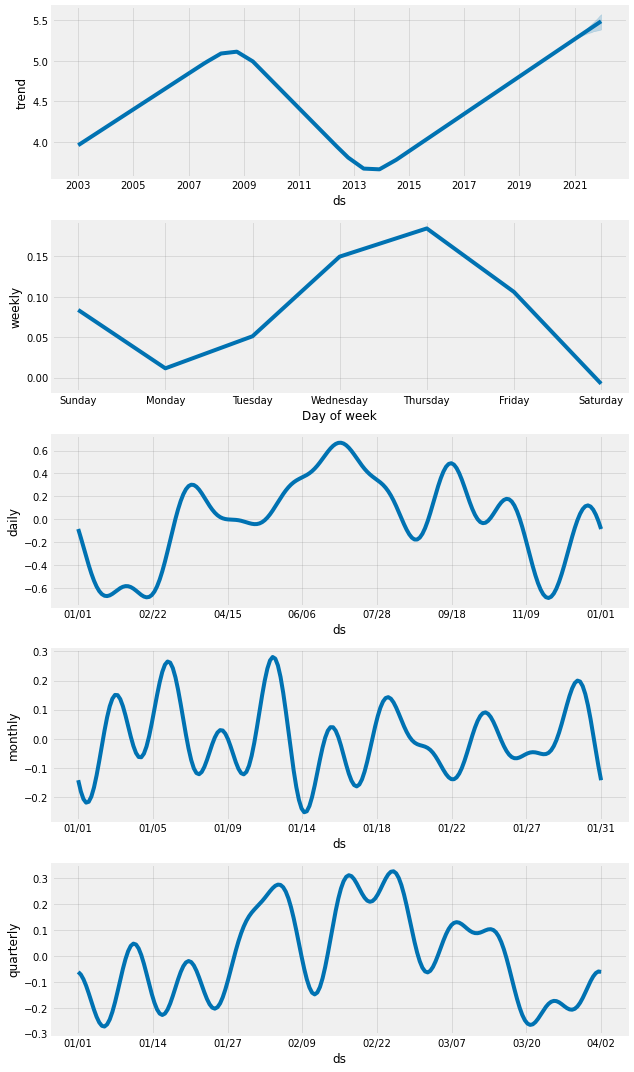

In [7]:
# forecasting for violent crime
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
forecast = n.predict(future)

fig = n.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), n, forecast)

fig3 = n.plot_components(forecast)
fig3_1 = plot_plotly(n, forecast)
fig3_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


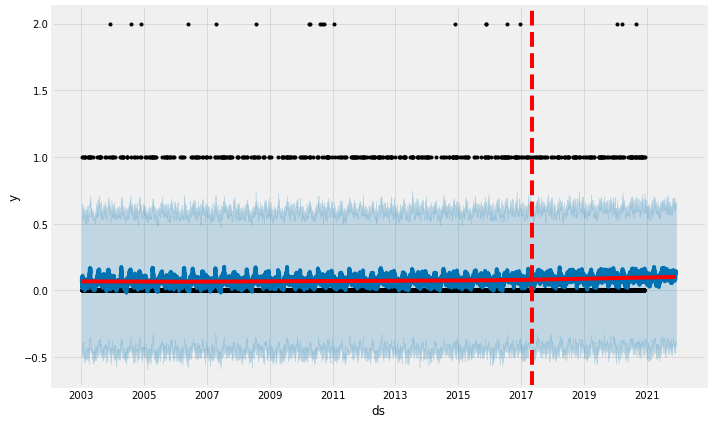

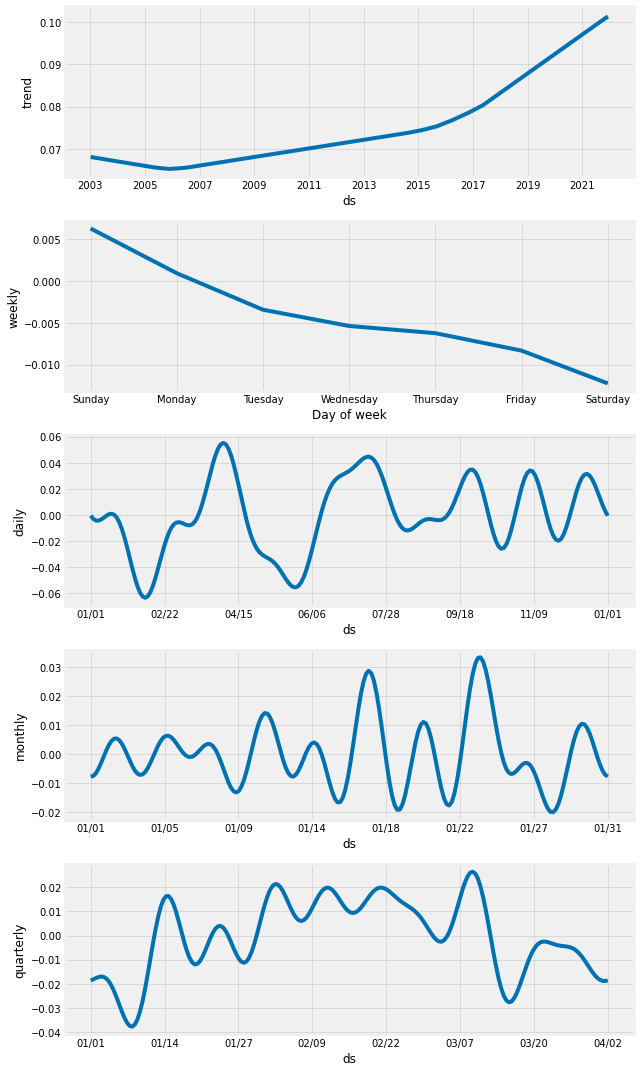

In [8]:
# forecasting for murder rates
df_viol_mur_fbprophet = df_viol_mur

df_viol_mur_o = df_viol_mur_fbprophet.resample("D").size().reset_index()
df_viol_mur_o.columns = ["date", "daily_crime_count"]
df_viol_mur_o_final = df_viol_mur_o.rename(
    columns={"date": "ds", "daily_crime_count": "y"}
)

o = Prophet(interval_width=0.95, yearly_seasonality=False)
o.add_seasonality(name="monthly", period=30.5, fourier_order=10)
o.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
o.add_seasonality(name="weekly", period=52, fourier_order=10)
o.add_seasonality(name="daily", period=365, fourier_order=10)
o.fit(df_viol_mur_o_final)

future = o.make_future_dataframe(periods=365, freq="D")
forecast = o.predict(future)

fig = o.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), o, forecast)

fig4 = o.plot_components(forecast)
fig4_1 = plot_plotly(o, forecast)